<a href="https://colab.research.google.com/github/aerionator/Water-Quality-Potability/blob/main/Fix_Water_Quality_and_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Water Quality and Potability Case-study

### This dataset is valuable for water quality assessment, water treatment planning, and ensuring the safety of drinking water supplies. It can be utilized by water treatment plants, environmental agencies, and researchers to make data-driven decisions regarding water quality and potability.


![Water quality](https://storage.googleapis.com/kaggle-datasets-images/3698125/6412402/d398e13fe3c4fec327081f056f736ed5/dataset-cover.jpg?t=2023-09-04-07-29-33)

# Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


# Loading Data

In [ ]:
df_water_quality = pd.read_csv('/content/drive/MyDrive/archive/water_potability.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling

In [ ]:
df_water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df_water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df_water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df_water_quality.shape

(3276, 10)

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputed_values = imputer.fit_transform(df_water_quality)

In [ ]:
df_water_quality_imputed = pd.DataFrame(columns = list(df_water_quality.columns), data = imputed_values)

In [ ]:
df_water_quality_imputed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [ ]:
df_water_quality_imputed.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# EDA | Exploratory Data Analysis

<Axes: >

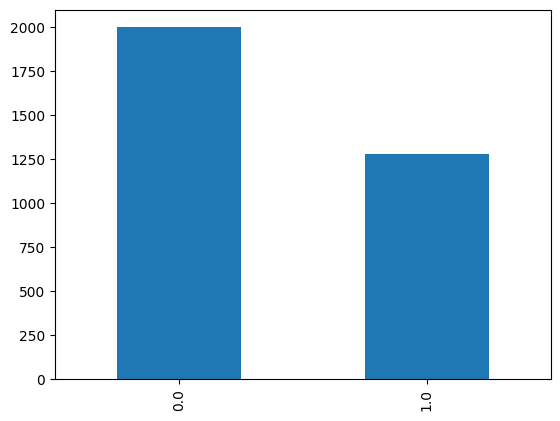

In [ ]:
df_water_quality_imputed['Potability'].value_counts().plot(kind = 'bar')

## The data is imbalanced

In [ ]:
min_ratio = df_water_quality_imputed['Potability'].value_counts().min()

In [ ]:
df_water_quality_imputed_0 = df_water_quality_imputed[df_water_quality_imputed['Potability'] == 0].sample(min_ratio, replace = True)
df_water_quality_imputed_1 = df_water_quality_imputed[df_water_quality_imputed['Potability'] == 1]
df_water_quality_imputed_balanced = pd.concat([df_water_quality_imputed_0, df_water_quality_imputed_1])

<Axes: >

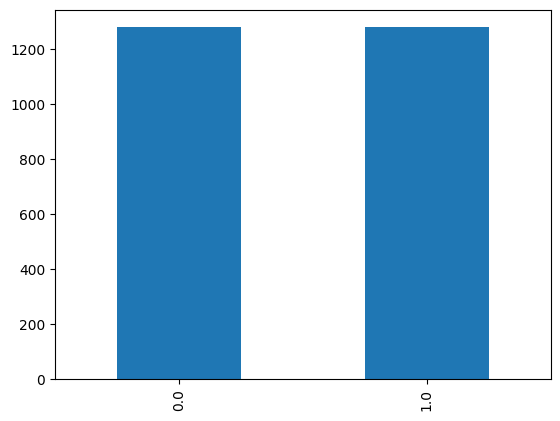

In [ ]:
df_water_quality_imputed_balanced['Potability'].value_counts().plot(kind = 'bar')

<Axes: >

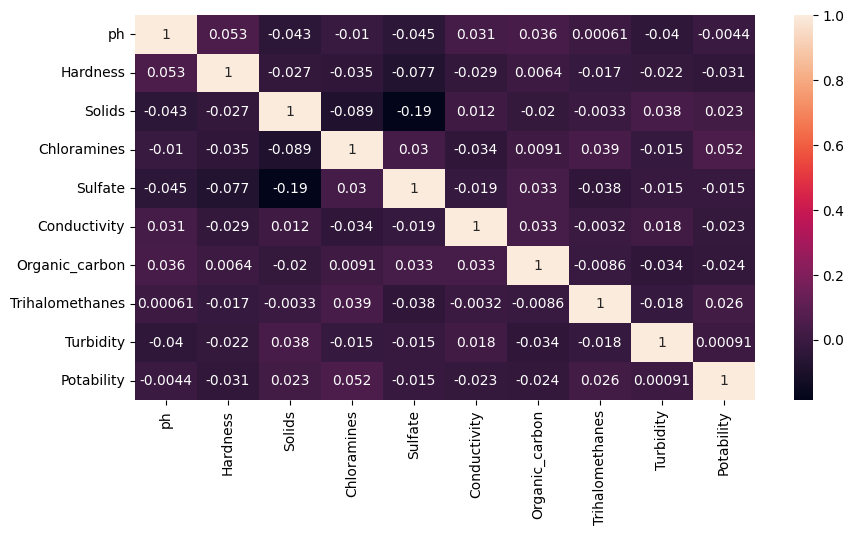

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_water_quality_imputed_balanced.corr(), annot = True)

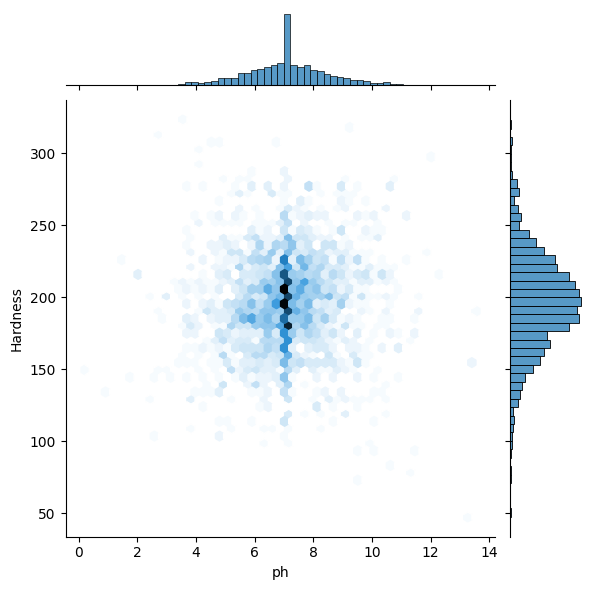

In [ ]:
sns.jointplot(x = 'ph', y = 'Hardness', data = df_water_quality_imputed_balanced, kind = "hex")

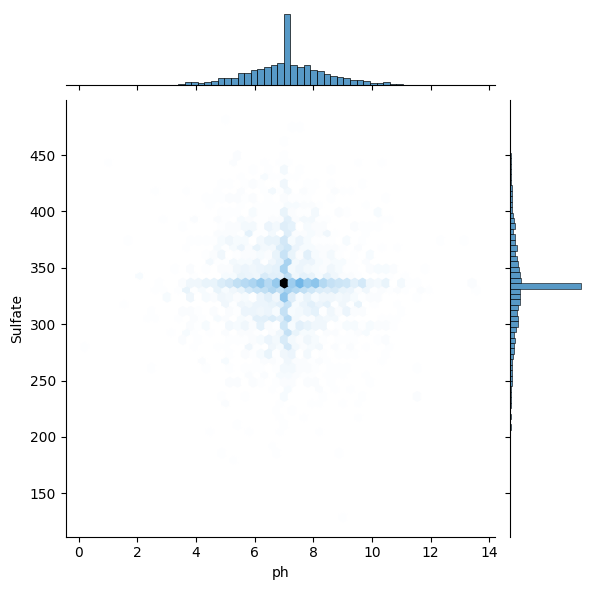

In [ ]:
sns.jointplot(x = 'ph', y = 'Sulfate', data = df_water_quality_imputed_balanced, kind = "hex")

<Axes: xlabel='Organic_carbon', ylabel='ph'>

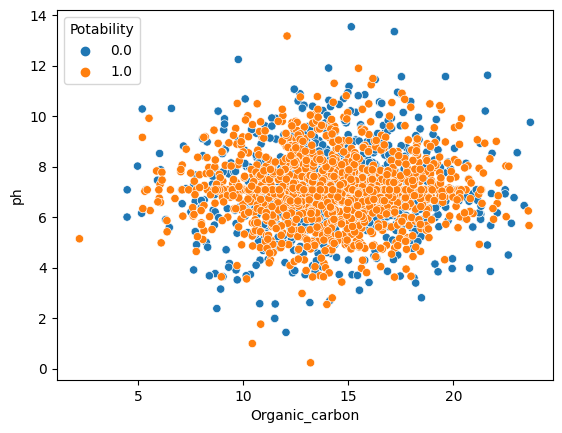

In [ ]:
sns.scatterplot(x = 'Organic_carbon', y = 'ph', data = df_water_quality_imputed_balanced, hue = 'Potability'  )

# Data Preprocessing

In [ ]:
scaler = MinMaxScaler()
df_scaled_vales = scaler.fit_transform(df_water_quality_imputed_balanced)
df_water_quality_scaled = pd.DataFrame(columns = list(df_water_quality.columns), data = df_scaled_vales)

In [ ]:
df_water_quality_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.514754,0.611356,0.270726,0.411355,0.562292,0.425280,0.558471,0.446190,0.794738,0.0
1,0.565405,0.541731,0.302420,0.513493,0.749367,0.247970,0.399338,0.590911,0.253491,0.0
2,0.623083,0.559235,0.388085,0.537669,0.581699,0.425950,0.630746,0.476020,0.725978,0.0
3,0.727968,0.579029,0.261420,0.523469,0.664820,0.139805,0.691856,0.311884,0.528765,0.0
4,0.551791,0.575904,0.251208,0.404905,0.581699,0.464034,0.435568,0.502662,0.586893,0.0


In [ ]:
X = df_water_quality_scaled.drop('Potability', axis = 1)
y = df_water_quality_scaled['Potability']

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Modeling

In [ ]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svc_clf = SVC()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()

In [ ]:
estimators = [lr_clf, dt_clf, svc_clf, rf_clf, xgb_clf]

In [ ]:
lr_clf_params = {
    'penalty' : ['l1', 'l2'],
    'C' : [i*0.1 for i in range(1, 10, 1)],
    'solver' : ['saga', 'liblinear'],
    'max_iter' : [i for i in range(100, 500, 100)]
}

dt_clf_params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['sqrt', 'log2']
}

svc_clf_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [i*0.1 for i in range(1, 10, 1)]
}

rf_clf_params = {
    'n_estimators' : [i for i in range(10, 200, 10)],
    'criterion' : ['gini', 'entropy']
}

xgb_clf_params = {
    'max_depth' :[i for i in range(1, 10, 1)],
    'n_estimators' : [i for i in range(100, 500, 100)]
}

In [ ]:
params = [lr_clf_params, dt_clf_params, svc_clf_params, rf_clf_params, xgb_clf_params]

In [ ]:
CVs = []
for estimator, parameter in zip(estimators, params):
    cv = GridSearchCV(estimator, parameter, n_jobs = -1)
    cv.fit(X_train, y_train)
    CVs.append(cv)

In [ ]:
for i in CVs:
    print(i.best_estimator_ ,i.best_params_, i.best_score_)
    print('-----')

LogisticRegression(C=0.4, penalty='l1', solver='saga') {'C': 0.4, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'} 0.5136835418764083
-----
DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       splitter='random') {'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'} 0.6389424229349442
-----
SVC(C=0.9) {'C': 0.9, 'kernel': 'rbf'} 0.6340440577208878
-----
RandomForestClassifier(n_estimators=130) {'criterion': 'gini', 'n_estimators': 130} 0.6991035044824775
-----
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=Non

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.75

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       265
         1.0       0.74      0.73      0.74       247

    accuracy                           0.75       512
   macro avg       0.75      0.75      0.75       512
weighted avg       0.75      0.75      0.75       512



### Our best score is 70% Accuracy.
### Let's try to use DNN

In [ ]:
Ann_model = Sequential([
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
Ann_model.compile(
    optimizer = 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['Accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 7)

In [ ]:
Ann_history = Ann_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, callbacks = [early_stopping])

Epoch 1/50
64/64 [==============================] - 2s 11ms/step - loss: 0.6942 - Accuracy: 0.5020 - val_loss: 0.6923 - val_Accuracy: 0.5195
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 0.6937 - Accuracy: 0.5054 - val_loss: 0.6930 - val_Accuracy: 0.5000
Epoch 3/50
64/64 [==============================] - 0s 5ms/step - loss: 0.6930 - Accuracy: 0.5093 - val_loss: 0.6930 - val_Accuracy: 0.4824
Epoch 4/50
64/64 [==============================] - 0s 5ms/step - loss: 0.6922 - Accuracy: 0.5108 - val_loss: 0.6920 - val_Accuracy: 0.5176
Epoch 5/50
64/64 [==============================] - 0s 5ms/step - loss: 0.6909 - Accuracy: 0.5284 - val_loss: 0.6895 - val_Accuracy: 0.5293
Epoch 6/50
64/64 [==============================] - 0s 5ms/step - loss: 0.6897 - Accuracy: 0.5372 - val_loss: 0.6878 - val_Accuracy: 0.5625
Epoch 7/50
64/64 [==============================] - 0s 5ms/step - loss: 0.6806 - Accuracy: 0.5455 - val_loss: 0.6794 - val_Accuracy: 0.5664
Epoch 8/50
64/64 [=

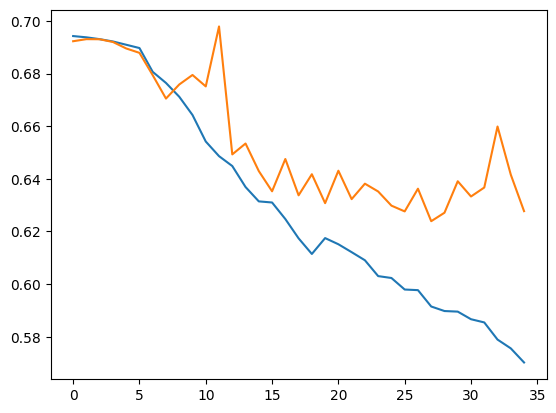

In [ ]:
plt.plot(Ann_history.history['loss'])
plt.plot(Ann_history.history['val_loss'])

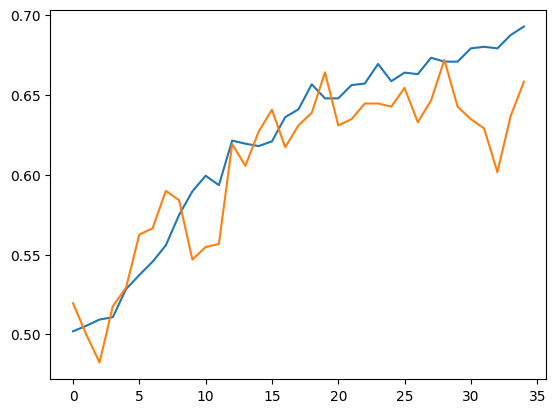

In [ ]:
plt.plot(Ann_history.history['Accuracy'])
plt.plot(Ann_history.history['val_Accuracy'])

In [ ]:
Ann_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.6277 - Accuracy: 0.6582


[0.627720832824707, 0.658203125]

### We got here, a 64.5% Accuracy which is not as good as the randomforest classifier

### I will go with randomForest classifier with 70% Accuracy

# Cari ANN Pake GridSearchCV

In [ ]:
# Fungsi untuk menghasilkan model Deep ANN
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Membuat regresi model ANN
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Membuat ruang pencarian Grid
# Lihat berbagai metode penilaian dengan menggunakan sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring=custom_Scoring,
                         cv=5)

#########################################
# Mengukur berapa lama waktu yang diperlukan untuk menemukan parameter terbaik
import time
StartTime=time.time()

# Menjalankan 'Grid Search' untuk parameter yang berbeda
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Waktu Berjalan: ", round((EndTime-StartTime)/60), 'Menit')

print('########## Mencetak Parameter Terbaik ##########')
grid_search.best_params_

In [ ]:
# Menyesuaikan ANN ke set Pelatihan
model.fit(X_train, y_train ,batch_size = 20, epochs = 20, verbose=0)

# Menghasilkan Prediksi pada data pengujian
Prediction=model.predict(X_test)

# Menskalakan data price yang diprediksi kembali ke skala price awal
Prediction=TargetVarScalerFit.inverse_transform(Prediction)

# Menskalakan data price y_test kembali ke skala price awal
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Menskalakan data uji kembali ke skala aslinya
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Prices']=y_test_orig
TestingData['PredictedPrices']=Prediction
TestingData.head()

In [ ]:
# Menghitung absolute percent error
APE=100*(abs(TestingData['Prices']-TestingData['PredictedPrices'])/TestingData['Prices'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
plt.plot(y_test_orig, 'r--', label='truth')
plt.plot(Predictions, 'b', label='predict')
plt.title('Grafik Nilai Prediksi dan Observasi')
plt.legend()
plt.show()

TestingData.head()